In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
df_clean = pd.read_csv(filepath_or_buffer= "../data/Clean_Dataset.csv") 
df_clean

,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Entertainment,3.9,68.0,10000.0,10291,1,0.0,Everyone,0,0,0
1,Lifestyle,0.0,0.0,50.0,90,1,0.0,Everyone,0,0,0
2,Shopping,4.3,918.0,100000.0,135038,1,0.0,Everyone,1,0,0
3,Finance,5.0,6.0,50.0,53,1,0.0,Everyone,0,0,0
4,Food & Drink,4.3,830.0,100000.0,142498,1,0.0,Everyone,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9901,Music,0.0,0.0,10.0,14,1,0.0,Everyone,0,0,0
9902,Education,4.3,142.0,1000.0,2490,1,0.0,Everyone,0,0,0
9903,Music & Audio,5.0,9.0,1000.0,1035,1,0.0,Teen,1,0,0
9904,Entertainment,0.0,0.0,500.0,522,1,0.0,Everyone,1,0,0


In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9906 entries, 0 to 9905
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9906 non-null   object 
 1   Rating            9906 non-null   float64
 2   Rating Count      9906 non-null   float64
 3   Minimum Installs  9906 non-null   float64
 4   Maximum Installs  9906 non-null   int64  
 5   Free              9906 non-null   int64  
 6   Price             9906 non-null   float64
 7   Content Rating    9906 non-null   object 
 8   Ad Supported      9906 non-null   int64  
 9   In App Purchases  9906 non-null   int64  
 10  Editors Choice    9906 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 851.4+ KB


### Univariate Analysis

#### Categorical

In [28]:
categorical_df = df_clean.select_dtypes('object').copy()
categorical_df.head()

,Category,Content Rating
0,Entertainment,Everyone
1,Lifestyle,Everyone
2,Shopping,Everyone
3,Finance,Everyone
4,Food & Drink,Everyone


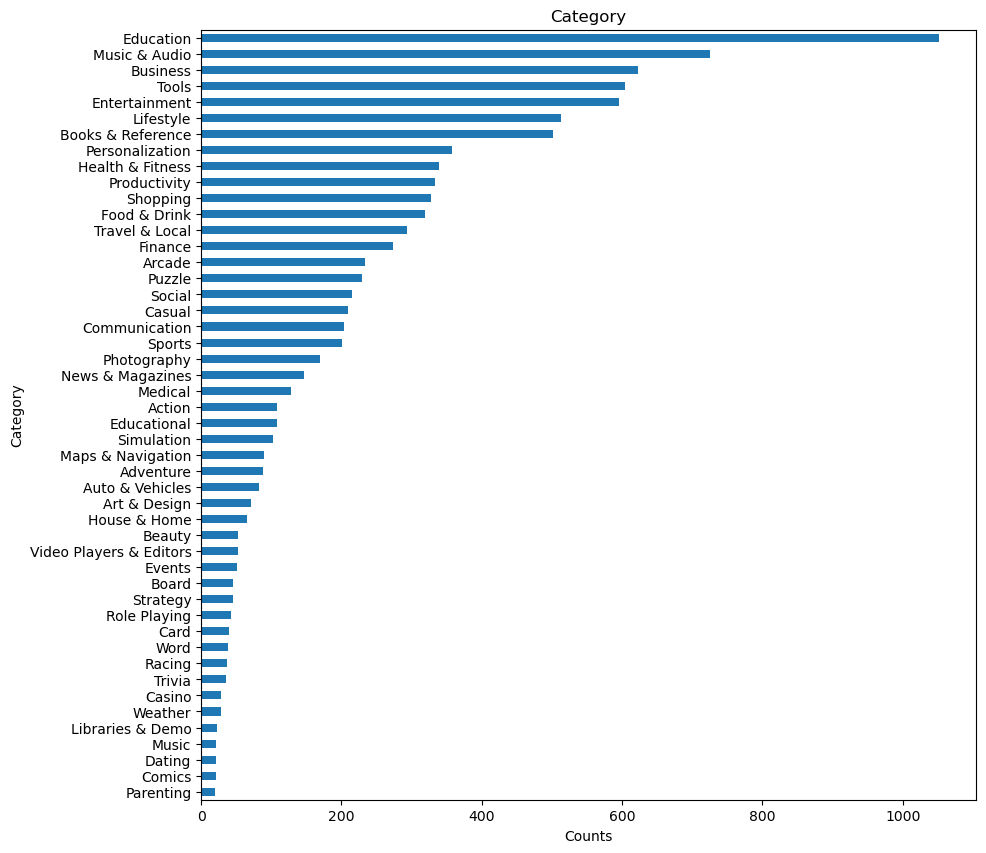

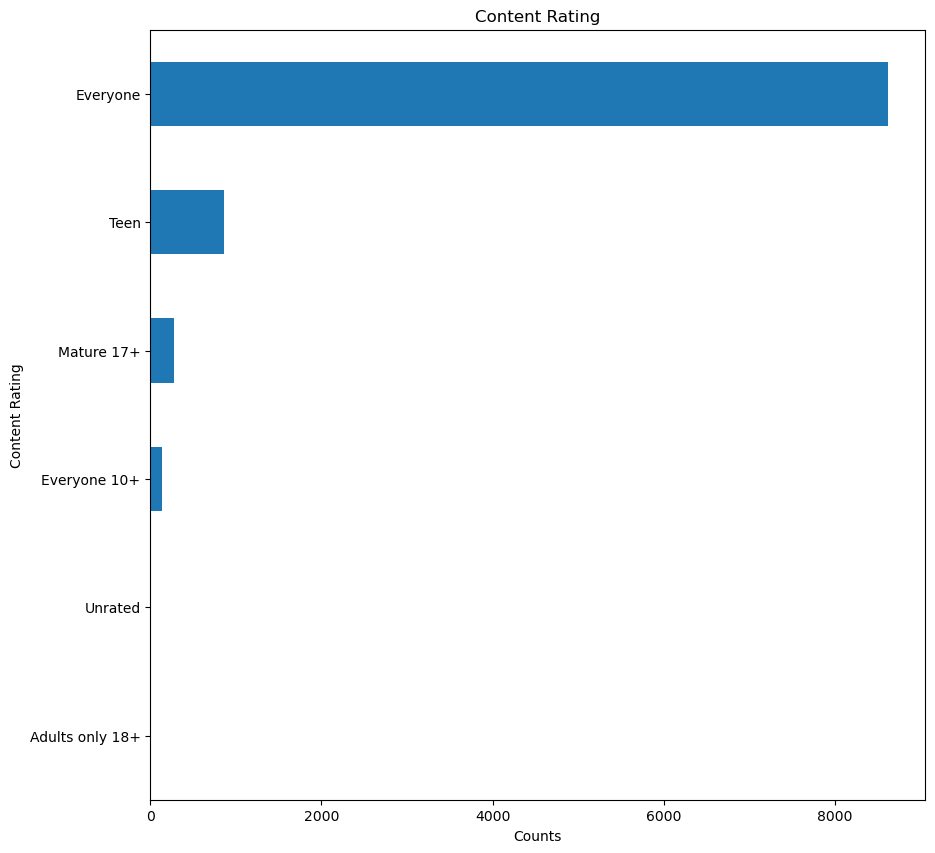

In [40]:
for column in categorical_df.columns:
    plt.figure(figsize=(10,10))
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.xlabel("Counts")
    plt.title(column)
    plt.show()

We can see that there is lots of education applications. 
Most of the applications is for everyone. 

#### Numerical 

In [41]:
df_clean.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice
count,9906.000000,9.906000e+03,9.906000e+03,9.906000e+03,9906.000000,9906.000000,9906.000000,9906.000000,9906.000000
mean,2.209691,1.404259e+03,9.695832e+04,1.815386e+05,0.983646,0.108279,0.501615,0.087018,0.000101
std,2.108915,2.359045e+04,1.685981e+06,3.734170e+06,0.126838,3.050349,0.500023,0.281876,0.010047
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,5.000000e+01,8.800000e+01,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,6.000000e+00,5.000000e+02,7.345000e+02,1.000000,0.000000,1.000000,0.000000,0.000000
75%,4.300000,4.075000e+01,5.000000e+03,7.113750e+03,1.000000,0.000000,1.000000,0.000000,0.000000
max,5.000000,1.569485e+06,1.000000e+08,2.955299e+08,1.000000,269.990000,1.000000,1.000000,1.000000


In [26]:
numeric_df = df_clean.select_dtypes(['int32','float64', 'int64']).copy()
numeric_df.head()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice
0,3.9,68.0,10000.0,10291,1,0.0,0,0,0
1,0.0,0.0,50.0,90,1,0.0,0,0,0
2,4.3,918.0,100000.0,135038,1,0.0,1,0,0
3,5.0,6.0,50.0,53,1,0.0,0,0,0
4,4.3,830.0,100000.0,142498,1,0.0,1,0,0


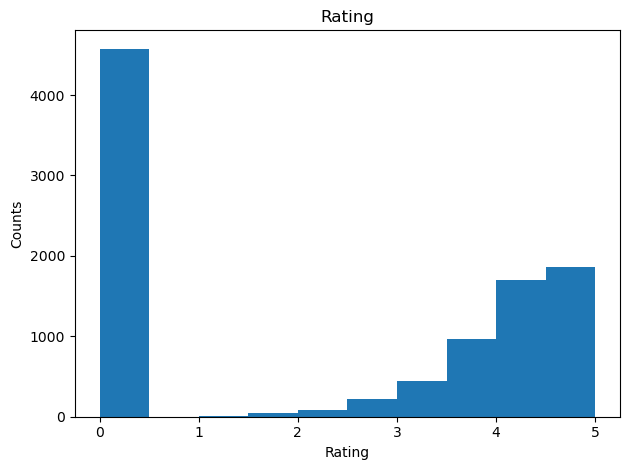

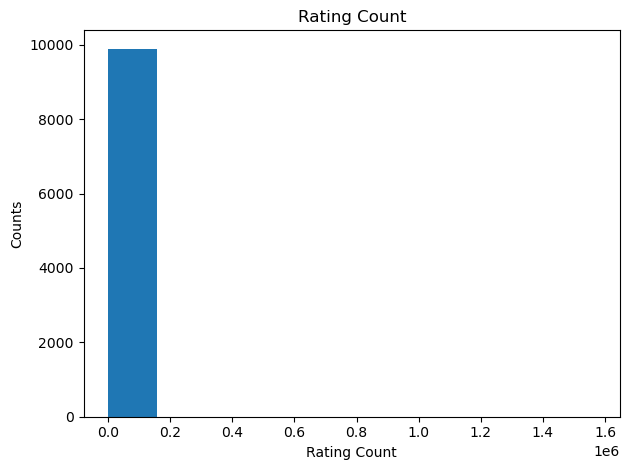

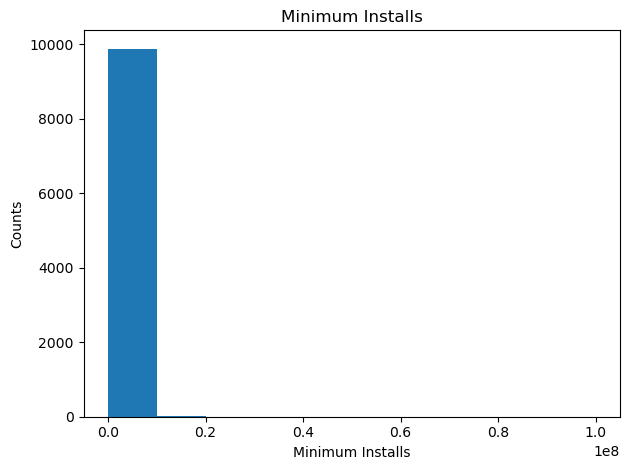

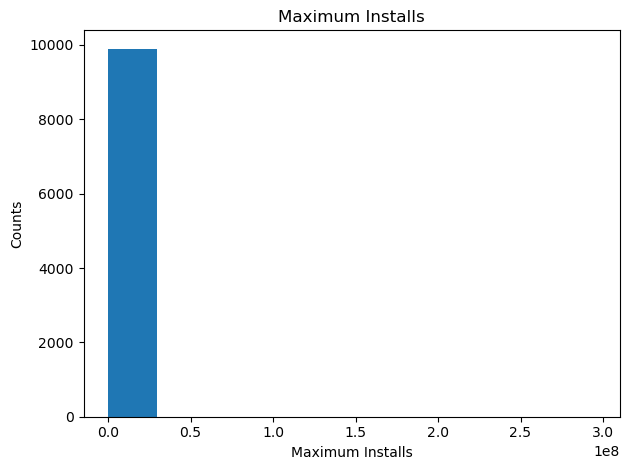

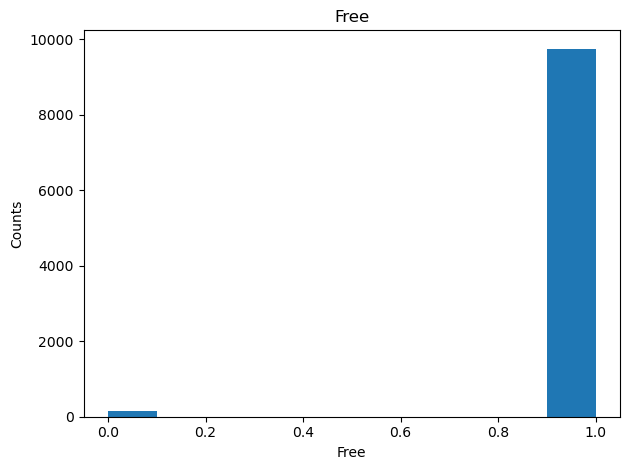

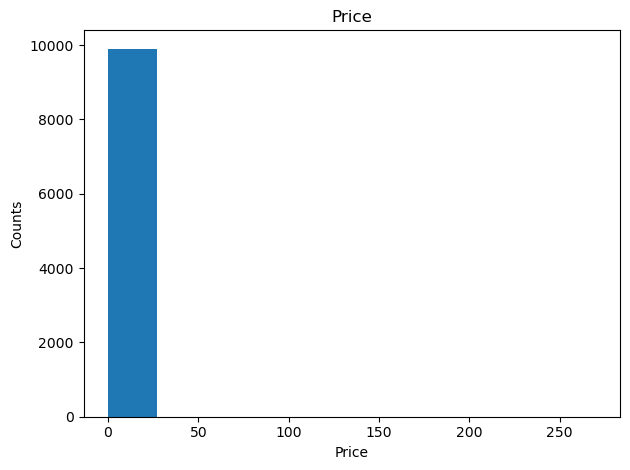

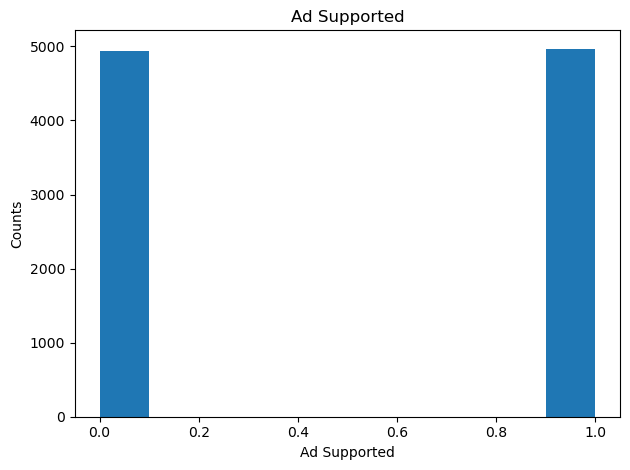

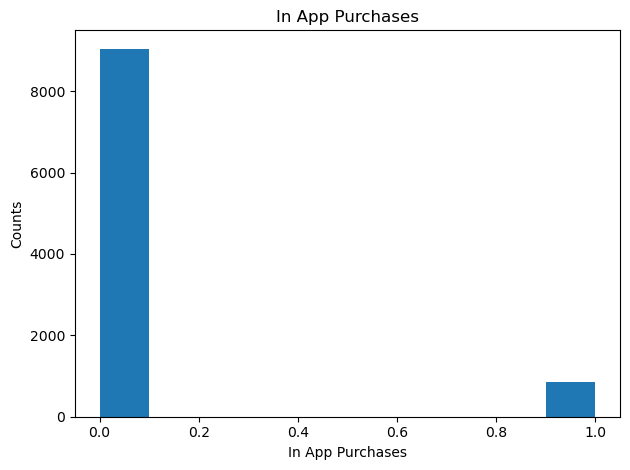

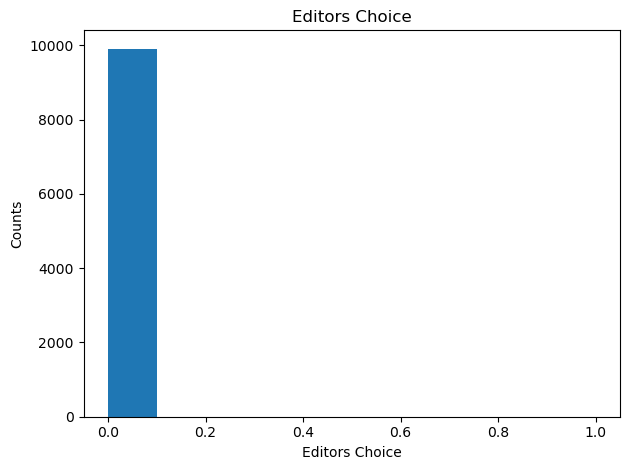

In [43]:
for column in numeric_df:
    plt.figure()
    plt.hist(df_clean[column], bins=10)
    plt.title(column)
    plt.ylabel('Counts')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

We can see that most of the application are rated 0
Most of the application are free
There is half of application ad supported and half non ad supported.
Most application does not have in app purchases 
None of the applications is editor choices. 

### Bivariate Analysis (target variable = Rating)

Our target variable is Rating, we need to analyse the relationship between this variable and our categorical and numerical values.

#### Categorical 

In [52]:
df_clean.groupby('Rating').value_counts()

Rating  Category   Rating Count  Minimum Installs  Maximum Installs  Free  Price  Content Rating  Ad Supported  In App Purchases  Editors Choice
0.0     Business   0.0           5.0               5                 1     0.0    Everyone        0             0                 0                 9
                                 10.0              14                1     0.0    Everyone        0             0                 0                 8
        Education  0.0           5.0               7                 1     0.0    Everyone        0             0                 0                 8
        Shopping   0.0           1.0               4                 1     0.0    Everyone        0             0                 0                 7
        Business   0.0           10.0              20                1     0.0    Everyone        0             0                 0                 7
                                                                                                         

In [48]:
df_clean['Rating'].value_counts()

Rating
0.0    4576
5.0     428
4.2     398
4.4     362
4.3     353
4.5     338
4.6     316
4.1     296
4.7     292
4.0     286
4.8     277
3.9     249
3.8     209
4.9     209
3.7     193
3.6     163
3.5     148
3.4     121
3.3      99
3.2      90
3.0      75
3.1      63
2.8      55
2.5      47
2.9      42
2.7      42
2.6      29
2.3      20
2.2      19
2.0      19
2.4      17
1.8      15
2.1      14
1.6      13
1.9      10
1.5       7
1.4       6
1.7       4
1.3       3
1.2       2
1.1       1
Name: count, dtype: int64

In [89]:
df_clean.groupby('Rating')['Category'].value_counts()

Rating  Category     
0.0     Education        496
        Business         423
        Music & Audio    360
        Lifestyle        280
        Tools            253
                        ... 
5.0     Trivia             1
        Strategy           1
        Racing             1
        Board              1
        Word               1
Name: count, Length: 1097, dtype: int64

In [90]:
df_clean.groupby('Rating')['Content Rating'].value_counts()

Rating  Content Rating
0.0     Everyone          4050
        Teen               367
        Mature 17+         110
        Everyone 10+        49
1.1     Everyone             1
                          ... 
4.9     Mature 17+           3
5.0     Everyone           384
        Teen                37
        Mature 17+           4
        Everyone 10+         3
Name: count, Length: 131, dtype: int64

#### Numerical

In [69]:
print(numeric_df)

      Rating  Rating Count  Minimum Installs  Maximum Installs  Free  Price  \
0        3.9          68.0           10000.0             10291     1    0.0   
1        0.0           0.0              50.0                90     1    0.0   
2        4.3         918.0          100000.0            135038     1    0.0   
3        5.0           6.0              50.0                53     1    0.0   
4        4.3         830.0          100000.0            142498     1    0.0   
...      ...           ...               ...               ...   ...    ...   
9901     0.0           0.0              10.0                14     1    0.0   
9902     4.3         142.0            1000.0              2490     1    0.0   
9903     5.0           9.0            1000.0              1035     1    0.0   
9904     0.0           0.0             500.0               522     1    0.0   
9905     4.9          19.0             500.0               656     1    0.0   

      Ad Supported  In App Purchases  Editors Choic

In [95]:
df_clean.groupby('Rating')['Free'].value_counts()

Rating  Free
0.0     1       4514
        0         62
1.1     1          1
1.2     1          2
1.3     1          2
                ... 
4.8     0          8
4.9     1        204
        0          5
5.0     1        424
        0          4
Name: count, Length: 67, dtype: int64

In [94]:
df_clean.groupby('Rating')['Price'].value_counts()

Rating  Price
0.0     0.00     4514
        0.99       22
        2.99        5
        1.49        3
        4.99        3
                 ... 
5.0     0.00      424
        1.99        1
        0.99        1
        1.49        1
        14.99       1
Name: count, Length: 156, dtype: int64

In [73]:
df_clean.groupby('Rating')['Ad Supported'].value_counts()

Rating  Ad Supported
0.0     0               2670
        1               1906
1.1     0                  1
1.2     0                  2
1.3     0                  2
                        ... 
4.8     1                127
4.9     0                114
        1                 95
5.0     0                234
        1                194
Name: count, Length: 79, dtype: int64

In [91]:
df_clean.groupby('Rating')['In App Purchases'].value_counts()

Rating  In App Purchases
0.0     0                   4411
        1                    165
1.1     0                      1
1.2     0                      2
1.3     0                      3
                            ... 
4.8     1                     25
4.9     0                    189
        1                     20
5.0     0                    402
        1                     26
Name: count, Length: 77, dtype: int64

In [93]:
df_clean.groupby('Rating')['Editors Choice'].value_counts()

Rating  Editors Choice
0.0     0                 4576
1.1     0                    1
1.2     0                    2
1.3     0                    3
1.4     0                    6
1.5     0                    7
1.6     0                   13
1.7     0                    4
1.8     0                   15
1.9     0                   10
2.0     0                   19
2.1     0                   14
2.2     0                   19
2.3     0                   20
2.4     0                   17
2.5     0                   47
2.6     0                   29
2.7     0                   42
2.8     0                   55
2.9     0                   42
3.0     0                   75
3.1     0                   63
3.2     0                   90
3.3     0                   99
3.4     0                  121
3.5     0                  148
3.6     0                  163
3.7     0                  193
3.8     0                  209
3.9     0                  249
4.0     0                  286
4.1     0       

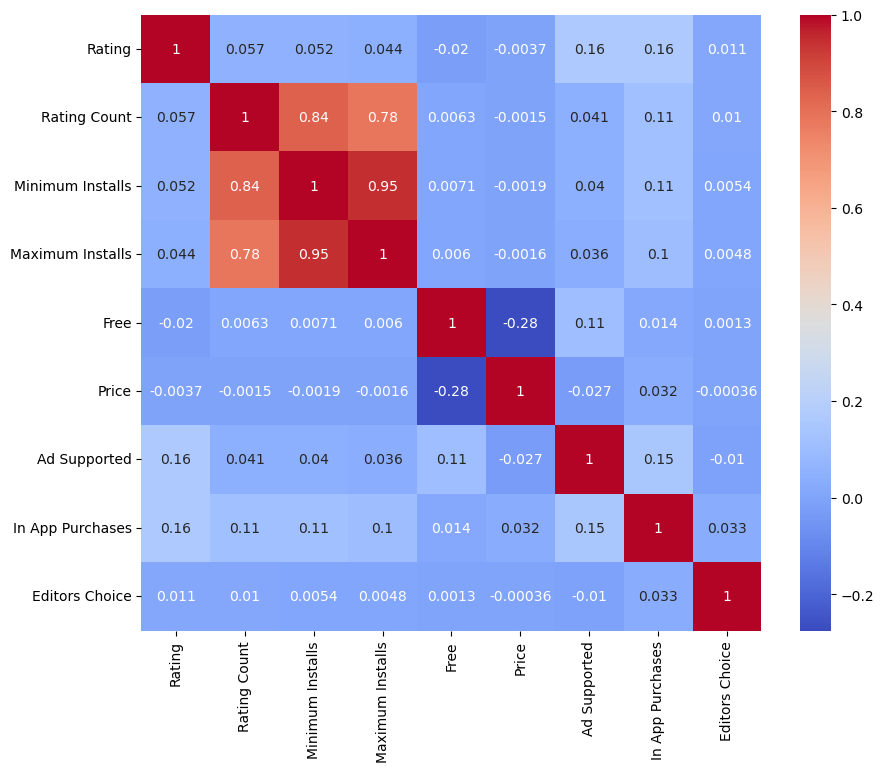

In [107]:
columns = ['Rating', 'Rating Count', 'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Ad Supported', 'In App Purchases', 'Editors Choice']
correlation_matrix = df_clean[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.show()

We can see that the columns maximum installs, minimum installs and rating counts have the most correlation between each other. 
For our target variable Rating, the correlation is not really strong with the other columns.